kaggle competition https://www.kaggle.com/competitions/titanic
public score 0.77

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!kaggle competitions list

ref                                                                              deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/home-credit-credit-risk-model-stability      2024-05-06 23:59:00  Featured          $105,000        475           False  
https://www.kaggle.com/competitions/pii-detection-removal-from-educational-data  2024-04-23 23:59:00  Featured           $60,000        810           False  
https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification    2024-04-08 23:59:00  Research           $50,000       1369           False  
https://www.kaggle.com/competitions/playground-series-s4e2                       2024-02-29 23:59:00  Playground            Swag       1452           False  
https://www.kaggle.com/competitions/planttraits2024 

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 59.1MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
import seaborn as sns

<Axes: xlabel='Sex', ylabel='Age'>

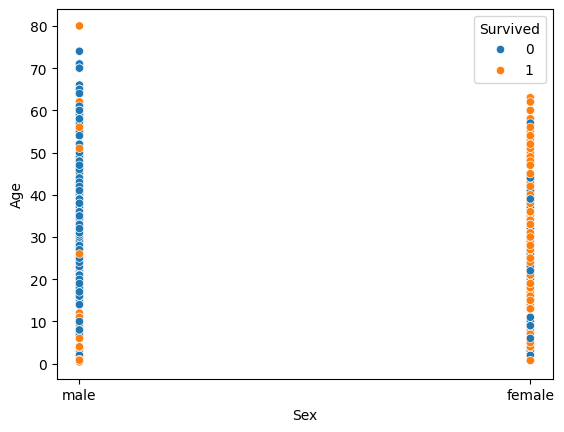

In [ ]:
sns.scatterplot(data = df, x = 'Sex', y = 'Age', hue = 'Survived')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.loc[df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.dropna(subset = ['Embarked'], inplace = True)

In [ ]:
s = df.Cabin.value_counts()

In [ ]:
s.loc[s.values > 1]

B96 B98            4
G6                 4
C23 C25 C27        4
E101               3
C22 C26            3
D                  3
F33                3
F2                 3
E44                2
B49                2
E24                2
B20                2
E8                 2
E67                2
B77                2
D35                2
C78                2
C65                2
B51 B53 B55        2
B5                 2
B57 B59 B63 B66    2
D36                2
B18                2
C124               2
C126               2
B35                2
C123               2
C92                2
C68                2
D20                2
B22                2
E25                2
C93                2
C125               2
F G73              2
D26                2
E121               2
C52                2
C83                2
F4                 2
B58 B60            2
C2                 2
D17                2
E33                2
D33                2
Name: Cabin, dtype: int64

In [ ]:
df.drop(columns = ['Cabin'], inplace = True)

In [ ]:
df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [ ]:
df.drop(columns = ['Ticket'], inplace = True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
df.Name.values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [ ]:
from collections import Counter
cnt = Counter()
for name in df.Name.values:
  for name_part in name.split(' '):
    name_part = name_part.replace(",", '')
    cnt[name_part] += 1

In [ ]:
cnt.most_common(100)

[('Mr.', 517),
 ('Miss.', 181),
 ('Mrs.', 124),
 ('William', 62),
 ('John', 44),
 ('Master.', 40),
 ('Henry', 34),
 ('James', 24),
 ('Charles', 23),
 ('Thomas', 22),
 ('George', 21),
 ('Edward', 18),
 ('Joseph', 16),
 ('Johan', 15),
 ('Frederick', 15),
 ('Richard', 14),
 ('Mary', 13),
 ('Samuel', 13),
 ('Arthur', 13),
 ('Alfred', 12),
 ('Anna', 11),
 ('Peter', 11),
 ('Alexander', 10),
 ('Robert', 10),
 ('Jr', 10),
 ('Leonard', 9),
 ('Elizabeth', 9),
 ('Andersson', 9),
 ('Ernest', 9),
 ('Karl', 9),
 ('J', 8),
 ('H', 8),
 ('Margaret', 8),
 ('Albert', 8),
 ('Martin', 8),
 ('Victor', 8),
 ('Maria', 7),
 ('Sage', 7),
 ('Dr.', 7),
 ('de', 7),
 ('Johnson', 6),
 ('E', 6),
 ('Panula', 6),
 ('(Elizabeth', 6),
 ('Goodwin', 6),
 ('Skoog', 6),
 ('Francis', 6),
 ('Helen', 6),
 ('Frank', 6),
 ('Sofia', 6),
 ('Rev.', 6),
 ('Alice', 6),
 ('Carter', 6),
 ('Harris', 5),
 ('Rice', 5),
 ('Williams', 5),
 ('Anne', 5),
 ('Hansen', 5),
 ('Daniel', 5),
 ('Gustaf', 5),
 ('Walter', 5),
 ('David', 5),
 ('Patrick'

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
def feature_mr(row):
  if 'Mr.' in row['Name']:
    return 1
  else:
    return 0

def feature_miss(row):
  if 'Miss.' in row['Name']:
    return 1
  else:
    return 0

def feature_mrs(row):
  if 'Mrs.' in row['Name']:
    return 1
  else:
    return 0

def feature_master(row):
  if 'Master.' in row['Name']:
    return 1
  else:
    return 0

def feature_dr(row):
  if 'Dr.' in row['Name']:
    return 1
  else:
    return 0

def feature_nick(row):
  if "'" in row['Name']:
    return 1
  else:
    return 0

def feature_second_name(row):
  if '(' in row['Name']:
    return 1
  else:
    return 0

In [ ]:
def feature_filler(df):
  df['mr'] = df.apply(feature_mr, axis = 1)
  df['miss'] = df.apply(feature_miss, axis = 1)
  df['mrs'] = df.apply(feature_mrs, axis = 1)
  df['master'] = df.apply(feature_master, axis = 1)
  df['dr'] = df.apply(feature_dr, axis = 1)
  df['nick'] = df.apply(feature_nick, axis = 1)
  df['second'] = df.apply(feature_second_name, axis = 1)

  df['Sex'].replace({'male' : 1, 'female' : 0}, inplace = True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,mr,miss,mrs,master,dr,nick,second
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0,0,0,0,0,0


In [ ]:
df['Sex'].replace({'male' : 1, 'female' : 0}, inplace = True)

In [ ]:
df = pd.get_dummies(data = df, columns = ['Pclass', 'Embarked'])

In [ ]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,mr,miss,...,master,dr,nick,second,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,0,...,0,0,0,1,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,1,...,0,0,0,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,0,...,0,0,0,1,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
df['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
Y = df.Survived
df.drop(columns = ['PassengerId', 'Name', 'Survived'], inplace = True)

In [ ]:
Y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [ ]:
df.head()

,Sex,Age,SibSp,Parch,Fare,mr,miss,mrs,master,dr,nick,second,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,71.2833,0,0,1,0,0,0,1,1,0,0,1,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0,35.0,1,0,53.1000,0,0,1,0,0,0,1,1,0,0,0,0,1
4,1,35.0,0,0,8.0500,1,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
df.isna().sum()

Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
mr              0
miss            0
mrs             0
master          0
dr              0
nick            0
second          0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(df)

In [ ]:
imp = KNNImputer(n_neighbors = 5)
X = imp.fit_transform(X)

In [ ]:
df_X = pd.DataFrame(X, columns = df.columns)

In [ ]:
df_X.isna().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
mr            0
miss          0
mrs           0
master        0
dr            0
nick          0
second        0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca

array([[-0.80107309,  0.30725711],
       [ 1.52052814, -0.75621905],
       [ 0.62265409,  0.98335018],
       ...,
       [ 0.645366  ,  1.02325573],
       [-0.15747507, -0.99109967],
       [-0.66457762,  0.46239873]])

In [ ]:
import matplotlib.pyplot as plt

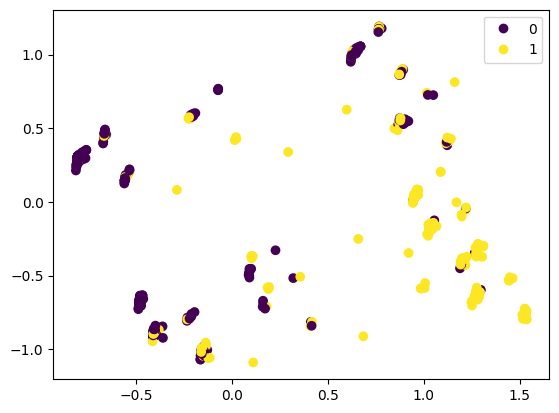

In [ ]:
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=Y)
plt.legend(handles=plot.legend_elements()[0], labels=[0,1])
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

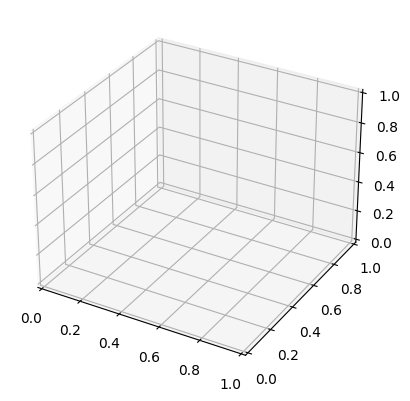

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=Y)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr = LogisticRegression()

In [ ]:
xgb = XGBClassifier(max_depth = 4, n_estimators = 200, learning_rate = 0.1)
lgb = LGBMClassifier(learning_rate=0.1, n_estimators = 200, max_depth = 4, verbose = -1)

In [ ]:
svc = SVC()

In [ ]:
rf = RandomForestClassifier()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=19)
scores = {'lr' : [], 'xgb' : [], 'lgb' : [], 'svc' : [], 'rf' : [], 'knn' : []}
for train_index, test_index in skf.split(X, Y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y.iloc[train_index], Y.iloc[test_index]
    lr.fit(x_train_fold, y_train_fold)
    xgb.fit(x_train_fold, y_train_fold)
    lgb.fit(x_train_fold, y_train_fold)
    svc.fit(x_train_fold, y_train_fold)
    rf.fit(x_train_fold, y_train_fold)
    knn.fit(x_train_fold, y_train_fold)
    scores['lr'].append(f1_score(y_test_fold, lr.predict(x_test_fold)))
    scores['xgb'].append(f1_score(y_test_fold, xgb.predict(x_test_fold)))
    scores['lgb'].append(f1_score(y_test_fold, lgb.predict(x_test_fold)))
    scores['svc'].append(f1_score(y_test_fold, svc.predict(x_test_fold)))
    scores['rf'].append(f1_score(y_test_fold, rf.predict(x_test_fold)))
    scores['knn'].append(f1_score(y_test_fold, knn.predict(x_test_fold)))
    #print(classification_report(y_test_fold, knn.predict(x_test_fold), target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        55
           1       0.79      0.79      0.79        34

    accuracy                           0.84        89
   macro avg       0.83      0.83      0.83        89
weighted avg       0.84      0.84      0.84        89

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        55
           1       0.68      0.74      0.70        34

    accuracy                           0.76        89
   macro avg       0.75      0.76      0.75        89
weighted avg       0.77      0.76      0.77        89

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        55
           1       0.77      0.68      0.72        34

    accuracy                           0.80        89
   macro avg       0.79      0.77      0.78        89
weighted avg       0.80      0.80      0.79        89

              preci

In [ ]:
scores

{'lr': [0.746268656716418,
  0.7567567567567567,
  0.7058823529411765,
  0.7619047619047619,
  0.8125,
  0.7605633802816901,
  0.71875,
  0.8125,
  0.7666666666666666,
  0.7761194029850745],
 'xgb': [0.7761194029850745,
  0.782608695652174,
  0.8235294117647058,
  0.7272727272727272,
  0.78125,
  0.7272727272727272,
  0.7999999999999999,
  0.78125,
  0.7619047619047619,
  0.7575757575757576],
 'lgb': [0.7761194029850745,
  0.8405797101449276,
  0.7692307692307693,
  0.7384615384615385,
  0.7692307692307693,
  0.6865671641791046,
  0.7741935483870968,
  0.7500000000000001,
  0.7540983606557378,
  0.7619047619047619],
 'svc': [0.7868852459016393,
  0.746268656716418,
  0.7213114754098361,
  0.6666666666666667,
  0.7368421052631579,
  0.7796610169491526,
  0.7333333333333334,
  0.7368421052631579,
  0.7368421052631579,
  0.6896551724137931],
 'rf': [0.8059701492537314,
  0.7246376811594202,
  0.78125,
  0.735294117647059,
  0.7575757575757576,
  0.7428571428571428,
  0.787878787878788,
  

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : np.arange(3, 15, 2),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

In [ ]:
g_res = gs.fit(X, Y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
g_res.best_score_

0.82790579572145

In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights = 'uniform')

In [ ]:
knn.fit(X, Y)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [ ]:
df_train = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
ids = df_train.PassengerId

In [ ]:
df_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_train.drop(columns = ['PassengerId', 'Ticket', 'Cabin'], inplace = True)

In [ ]:
feature_filler(df_train)

In [ ]:
df_train.head()

,Name,Sex,Age,SibSp,Parch,Fare,mr,miss,mrs,master,dr,nick,second,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,"Kelly, Mr. James",1,34.5,0,0,7.8292,1,0,0,0,0,0,0,0,0,1,0,1,0
1,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0,0,1,0,0,0,1,0,0,1,0,0,1
2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1,0,0,0,0,0,0,0,1,0,0,1,0
3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1,0,0,0,0,0,0,0,0,1,0,0,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0,0,1,0,0,0,1,0,0,1,0,0,1


In [ ]:
df_train = pd.get_dummies(data = df_train, columns = ['Pclass', 'Embarked'])

In [ ]:
df_train.drop(columns = ['Name'], inplace = True)

In [ ]:
X_train = scaler.transform(df_train)
X_train = imp.transform(X_train)

In [ ]:
preds = knn.predict(X_train)

In [ ]:
subm = pd.DataFrame(data = [ids, preds]).T

In [ ]:
subm.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
subm.rename(columns = {'Unnamed 0' : 'Survived'}, inplace = True)

In [ ]:
subm.to_csv('subm1.csv', index = False)